In [4]:
from get_repo_data import main
import plotly.express as px
import pandas as pd
import nbformat
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

In [5]:
# import data
commits = pd.read_csv('data/commits.csv')
users = pd.read_csv('data/users.csv')
issues = pd.read_csv('data/issues.csv')

In [6]:
# Create a bar chart of the user issues counts
issues_counts = issues.value_counts(subset=['user'])

issues_counts = issues_counts.reset_index()

issues_counts.sort_values(by='count', ascending=False, inplace=True)

fig = px.bar(data_frame=issues_counts, x='user', y='count', title='Issues per User')

fig.show()

In [7]:
# Create a bar chart of the issue states
issues_counts = issues.value_counts(subset=['state'])

issues_counts = issues_counts.reset_index()

issues_counts.sort_values(by='count', ascending=False, inplace=True)

fig = px.bar(data_frame=issues_counts, x='state', y='count', title='Issue States')

fig.show()

In [8]:
# Create a bar chart of the user type counts
users_counts = users.value_counts(subset=['type'])

users_counts = users_counts.reset_index()

users_counts.sort_values(by='count', ascending=False, inplace=True)

fig = px.bar(data_frame=users_counts, x='type', y='count', title='User Type Counts')

fig.show()

In [9]:
# Create a bar chart of the user company counts
users_counts = users.value_counts(subset=['company'])

users_counts = users_counts.reset_index()

users_counts.sort_values(by='count', ascending=False, inplace=True)

fig = px.bar(data_frame=users_counts, x='company', y='count', title='User Company Counts')

fig.show()

In [10]:
# Create a bar chart of the user location counts
users_counts = users.value_counts(subset=['location'])

users_counts = users_counts.reset_index()

users_counts.sort_values(by='count', ascending=False, inplace=True)

fig = px.bar(data_frame=users_counts, x='location', y='count', title='User Location Counts')

fig.show()

In [11]:
# Create a bar chart of the user bio counts
users_counts = users.value_counts(subset=['bio'])

users_counts = users_counts.reset_index()

users_counts.sort_values(by='count', ascending=False, inplace=True)

fig = px.bar(data_frame=users_counts, x='bio', y='count', title='User Bio Counts')

fig.show()

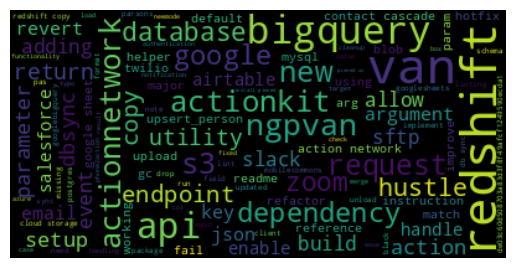

In [12]:
# generate word cloud from issue titles (https://github.com/amueller/word_cloud/blob/main/examples/simple.py)

text = ' '.join(issues['title'])

lemma = WordNetLemmatizer()
text_lemmatized = [lemma.lemmatize(w.lower()) for w in text.split()]
text = ' '.join(text_lemmatized)

stopwords = set(STOPWORDS)
stopwords.update([
    'parson','python', 'connector', 'fix', 'upsert', 'add','addition', 'update',
    'remove', 'change', 'doc', 'docs','documentation', 'table',
    'function', 'use', 'error', 'data', 'bump', 'version','type',
    'test', 'release', 'feat', 'feature', 'support','method',    
    'column','bug','code','added','file','phone','string','added',
    'name','class','list','issue','py','number','empty','github',
    'create','query','option','row','import'
])


wordcloud = WordCloud(max_font_size=40,stopwords=stopwords).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



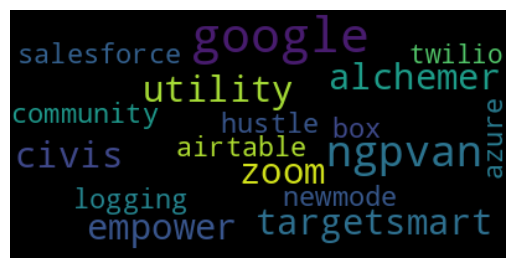

In [13]:
# word cloud of open issues

open_issues = issues[issues['state'] == 'open']

import inspect, parsons

modules = [module[0] for module in inspect.getmembers(parsons, inspect.ismodule)]

text = open_issues['title'].tolist()

text = [item.lower().strip() for item in text]

norm_text = [item.split() for item in text]

flattened_list = [item for sublist in norm_text for item in sublist]


filtered_text = [item.lower().strip() for item in flattened_list if item in modules]

text = " ".join(filtered_text)

lemma = WordNetLemmatizer()
text_lemmatized = [lemma.lemmatize(w.lower()) for w in text.split()]
text = ' '.join(text_lemmatized)

stopwords = set(STOPWORDS)
stopwords.update([
    'parson','python', 'connector', 'fix', 'upsert', 'add','addition', 'update',
    'remove', 'change', 'doc', 'docs','documentation', 'table',
    'function', 'use', 'error', 'data', 'bump', 'version','type',
    'test', 'release', 'feat', 'feature', 'support','method',    
    'column','bug','code','added','file','phone','string','added',
    'name','class','list','issue','py','number','empty','github',
    'create','query','option','row','import'
])

wordcloud = WordCloud(max_font_size=40,stopwords=stopwords).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

[['3.8', 'remove', 'support', 'for', 'python'], ['bump', '/docs', 'civis', '2.4.0', '1.16.1', 'from', 'in', 'to'], ['bump', '1.68.0', 'grpcio', '1.62.2', '/docs', 'from', 'in', 'to'], ['bump', 'github/codeql-action', '3.26.12', 'from', '3.27.4', 'to'], ['bump', 'de03c60d508703a83d3f8f49afcf1249590ecda1', '5743f9419e8ab31942eab7471341261126a29f03', 'from', 'install-pinned/uv', 'to'], ['hustle.py', 'update'], ['introspection', 'add', ':', 'parsons[van]', 'endpoint', 'ngp'], ['bump', '4.2.1', 'actions/checkout', '4.2.2', 'from', 'to'], ['actions/setup-python', 'bump', '5.2.0', '5.3.0', 'from', 'to'], ['bump', '/docs', '3.7.0', '6.1.4', 'from', 'gspread', 'in', 'to'], ['bump', '/docs', '1.4.4.1', 'suds-py3', '1.4.5.0', 'from', 'in', 'to'], ['bump', '2.16.0', '/docs', 'google-cloud-storage', '2.18.2', 'from', 'in', 'to'], ['bump', '8.0.18', '9.1.0', 'from', 'mysql-connector-python', 'to'], ['python', 'support', '3.13'], ['bump', 'joblib', '1.2.0', 'from', '1.4.2', 'to'], ['bump', '0.5.2', '

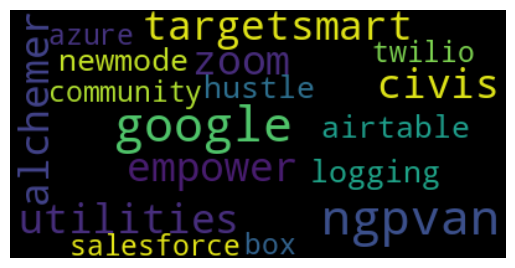

In [ ]:
# wordclould with only names of parsons modules for open issues
import inspect, parsons
from collections import Counter

modules = [module[0] for module in inspect.getmembers(parsons, inspect.ismodule)]

titles_unnorm = open_issues['title'].tolist()

titles = [list(set(title.lower().split())) for title in titles_unnorm]

print(titles)

titles_modules = [title_item for title in titles for title_item in title if title_item in modules ] #do this for each title and then take set

print(Counter(titles_modules))

titles_modules = " ".join(titles_modules)

wordcloud = WordCloud(max_font_size=40,stopwords=stopwords).generate(titles_modules)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# wordclould with only names of *non* parsons modules for open issues
import inspect, parsons
from collections import Counter

modules = [module[0] for module in inspect.getmembers(parsons, inspect.ismodule)]

titles_unnorm = open_issues['title'].tolist()

titles = [list(set(title.lower().split())) for title in titles_unnorm]

print(titles)

titles_not_modules = [title_item for title in titles for title_item in title if title_item not in modules ] #do this for each title and then take set

print(Counter(titles_not_modules))

stopwords = set(STOPWORDS)

titles_not_modules = " ".join(titles_not_modules)

wordcloud = WordCloud(max_font_size=40,stopwords=stopwords).generate(titles_not_modules)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()